In [2]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original',data_home='./')
mnist
#target 是标签，data是数据

E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X,y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

<function matplotlib.pyplot.show(*args, **kw)>

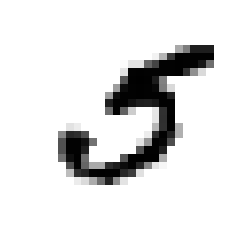

In [4]:
import matplotlib
import matplotlib.pyplot as plt
somedigit=X[36000]
somedigit_image=somedigit.reshape(28,28)
plt.imshow(somedigit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show

In [5]:
y[36000]

5.0

In [6]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
#乱排序
import numpy as np
shuffle_index=np.random.permutation(60000)
shuffle_index

array([16032, 19658, 38873, ..., 57582, 19231, 54482])

In [7]:
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]
y_train=(y_train==5)
y_test=(y_test==5)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
topredict=x_train[6]

In [9]:
topredict.shape

(784,)

In [10]:
sgd_clf.predict(topredict.reshape(1,-1))

array([False])

In [11]:
#自作交叉验证函数
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, random_state=42)  #随机抽层分割方法
for train_index, test_index in skfold.split(x_train,y_train):
    clone_clf=clone(sgd_clf)
    x_train_fold=x_train[train_index]
    y_train_fold=y_train[train_index]
    x_test_fold=x_train[test_index]
    y_test_fold=y_train[test_index]
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.96325


0.9676


0.9479


In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[53024,  1555],
       [  870,  4551]], dtype=int64)

In [13]:
#自订阈值方法
y_scores=sgd_clf.decision_function([topredict])
# y_scores array([-8396.0610493])
# y_train[6] Fale
threshold=0.0
y_pred=(y_scores>threshold)
y_pred

In [19]:
from sklearn.metrics import precision_recall_curve
y_scores=cross_val_predict(sgd_clf,x_train,y_train,cv=3,method="decision_function")
precision,recalls,threshold=precision_recall_curve(y_train,y_scores)#准确率，召回率和阈值之间的关系0

In [21]:
precision.shape

(59673,)

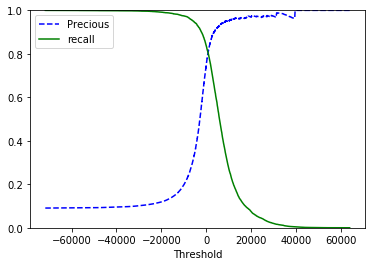

In [28]:
def plot_precision_recall_threshold(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"b--",label="Precious")
    plt.plot(threshold,recall[:-1],"g-",label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")#legend 位置
    plt.ylim([0,1])#设定上下线
plot_precision_recall_threshold(precision,recalls,threshold)
plt.show()

In [29]:
#ROC曲线
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train,y_scores)

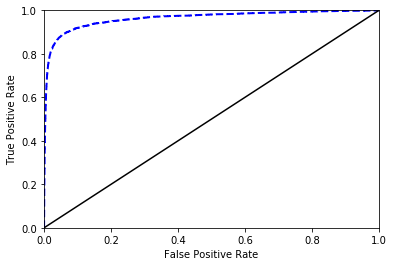

In [35]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,'b--',linewidth=2,label="ROC")
    plt.plot([0,1],[0,1],'k')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr,tpr)
plt.show()